# Cross Validation

In [1]:
# Data Mining 
import numpy as np
import pandas as pd
from scipy import stats

# Modeling 
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Visualization
from matplotlib import pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Setting style 
plt.style.use('fivethirtyeight')

In [2]:
boston = datasets.load_boston()
boston

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [3]:
# Separating data from target (X and y variables)
X = boston.data
y = boston.target

In [4]:
# Printing data
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
# Printing target 
y 

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
# Transforming into dataframe
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# Appending target to dataframe
final = df.copy()
final['MEDV'] = y
final.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Exploratory Data Analysis
## _Investigating Potential Relationships - Correlation Heat Map_
- Heatmaps are an effective way to visually examine the correlational structure of your predictors.

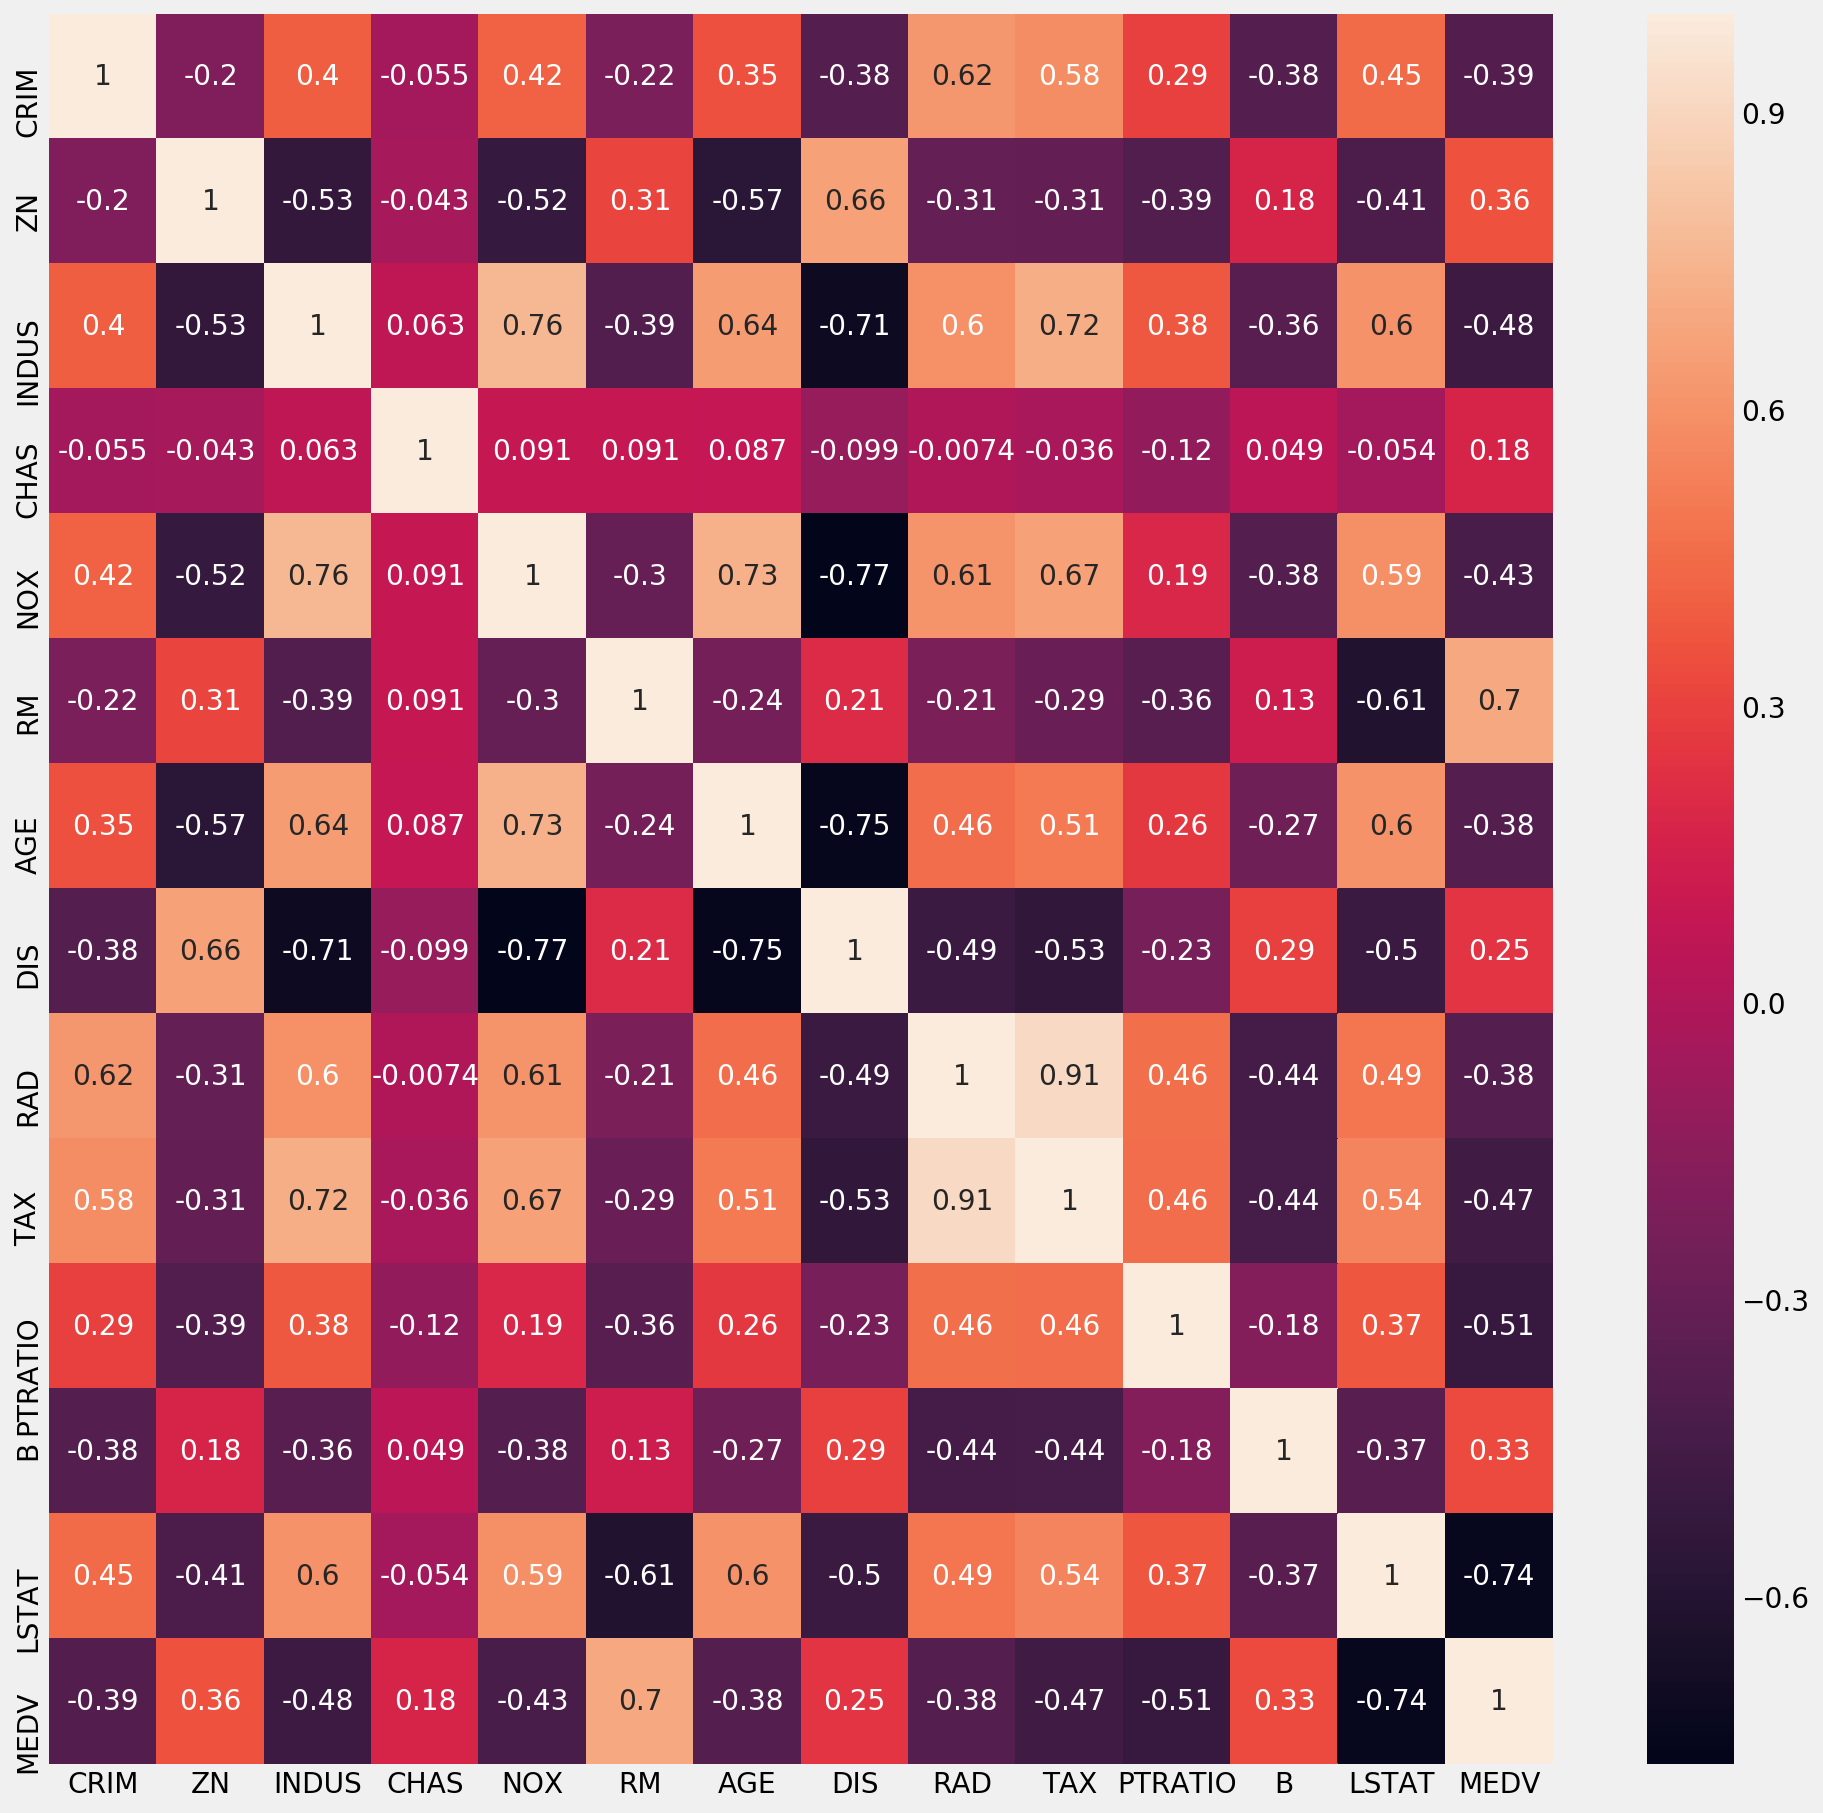

In [8]:
plt.figure(figsize=(15,15))
corrs = sns.heatmap(final.corr(),annot=True)
plt.show()

# Model Building 
### _Building MLR Model :  RM, AGE, & NOX as Predictor Variable_

Score: 0.5413494591410263


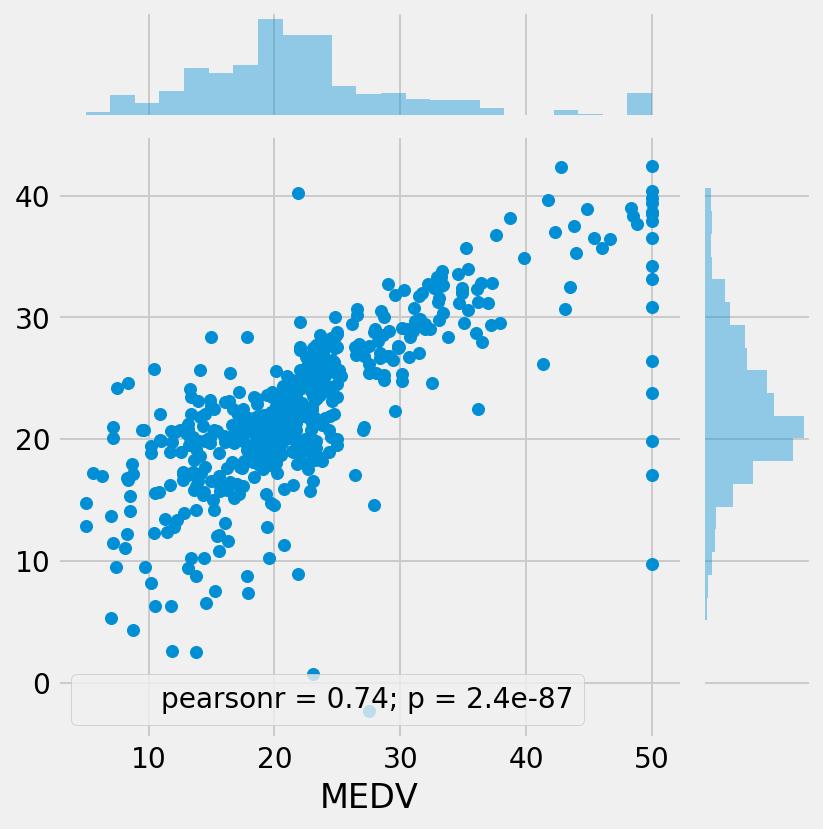

In [9]:
# Defining X and y variables 
X = final[['RM','AGE','NOX']]
y = final['MEDV']

# Fitting linear regression model 
linreg = LinearRegression()
linreg.fit(X,y)

# Making predictions 
y_pred = linreg.predict(X)

# Scoring model 
score = linreg.score(X,y)
print('Score:',score)

# Plotting
sns.jointplot(y,y_pred)

- The SLR/plot above fits the best model to our data, but in order to generalize this model to handle new data a train/test split must be utilized, which involves spitting data into subsets : 
    - Data on which to train (fit) the model 
    - Data on which to test the model, aka evaluating the quality of predictions 
- Scikit-Learn's train_test_split function allows train/test splits to be performed easily 
    - Changing the test_size argument alters the amount of data used for traininng/testing (represennted as a float)

# Performing Train/Test Split

## _50-50 Split_

In [10]:
# Defining X and y variables 
X = final[['RM','AGE','NOX']]
y = final['MEDV']

# Splitting data into training and testing sets (test_size = 0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Fitting MLR on training data  
linreg = LinearRegression()
linreg.fit(X_train,y_train)

# Making predictions on testing data
y_preds = linreg.predict(X_test)

# Scoring model on testing data
score1 = linreg.score(X_test,y_test)
print('50-50 Split Score:',score1)

# Plotting
sns.jointplot(y_test,y_preds)

50-50 Split Score: 0.47398949091993786


NameError: name 'y_preds1' is not defined

## _70-30 Split_

In [ ]:
# Defining X and y variables 
X = final[['RM','AGE','NOX']]
y = final['MEDV']

# Splitting data into training and testing sets (test_size = 0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Fitting MLR on training data  
linreg = LinearRegression()
linreg.fit(X_train,y_train)

# Making predictions on testing data
y_preds = linreg.predict(X_test)

# Scoring model on testing data
score2 = linreg.score(X_test,y_test)
print('70-30 Split Score:',score2)

# Plotting
sns.jointplot(y_test,y_preds)

## _90-10 Split_

In [ ]:
# Defining X and y variables 
X = final[['RM','AGE','NOX']]
y = final['MEDV']

# Splitting data into training and testing sets (test_size = 0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Fitting MLR on training data  
linreg = LinearRegression()
linreg.fit(X_train,y_train)

# Making predictions on testing data
y_preds = linreg.predict(X_test)

# Scoring model on testing data
score3 = linreg.score(X_test,y_test)
print('90-10 Split Score:',score3)

# Plotting
sns.jointplot(y_test,y_preds)

# Comparing Performance

In [ ]:
print('50-50 Split Score:',score1)
print('70-30 Split Score:',score2)
print('90-10 Split Score:',score3)